In [176]:
# %pip install sslbookdata
# %pip install scikit-learn
# %pip install matplotlib
# %pip install pandas
# %pip install hdbscan


In [177]:
# Imports

from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from sklearn.manifold import TSNE


import pandas as pd
import numpy as np
import sslbookdata

O que eu tenho que fazer:
Datasets utilizaveis: USPS, COIL2, DIGIT-1, G-241C, G-241N e TEXT

1) Construi grafos com duas etapas:
HDBSCAN*

2) Construção dos grafos usando um método baseado em densidade criando uma árvore geradora mínima

3) Implementar os métodos de aprendizado (Label difusion) que foram:
* GRF (Gaussian Random Fields)
* LGC (Local and GLobal Consistency)
* LapRLS (Laplacian Regularized Least Squares)
* LapSVM (Laplacian Support Vector Machine)
* RMGT (Robust Multi-class Graph Transductio)

In [178]:
# Upload dos datasets

datasets = {
    'USPS': sslbookdata.load_usps(0),
    'COIL': sslbookdata.load_coil2(0),
    'DIGIT': sslbookdata.load_digit1(0),
    'GC': sslbookdata.load_g241c(0),
    'GN': sslbookdata.load_g241n(0),
    # 'TEXT': sslbookdata.load_text(0)
}

# Primeiro passo do HDBSCAN*

Conceito de Core Distance: Raio mínimo necessário para que uma instância qualquer X seja considerado um objeto core, tendo em vista um número mínimo de pontos próximos (incluindo o próprio ponto)

O primeiro passo do HDBSCAN* é computar a core distance em relação a uma variável de número mínimo de pontos para todos os objetos de X

In [179]:
def computeCoreDistance(datasetToComputeDistance, min_samples):
    list_de_raios_minimos = []
    list_de_indices_vizinhos = []
    neighbors = NearestNeighbors(n_neighbors=min_samples).fit(datasetToComputeDistance)

    distances, indices = neighbors.kneighbors(datasetToComputeDistance)
    for i in range(len(datasetToComputeDistance)):
        list_de_raios_minimos.append(distances[i, -1])
        list_de_indices_vizinhos.append(indices[i])
    return list_de_raios_minimos, list_de_indices_vizinhos

[3.5340244364500677, 4.059147236337936, 4.719855170602876, 3.2237915413861793, 2.4819912235735453, 4.209462961685768, 3.6835064663709383, 4.828855966204327, 3.5973320458233866, 5.195696490331667, 6.8680866118849195, 4.910902047801788, 5.206198390023482, 3.922950467676534, 3.1613354686933075, 3.5590166333034996, 4.71776752009236, 3.355368177220153, 3.4289460925122235, 3.321233478946218, 4.239944330444792, 4.961548141596981, 6.463226387793, 4.074309670210479, 4.0994951990236155, 4.767901001570963, 3.275387276098713, 3.620590405224307, 2.7056701956279623, 2.384479855024053, 3.902064564107101, 4.659337181854286, 3.460730671333736, 5.885397143293477, 4.090459280280065, 4.854477501363427, 4.386460659415132, 4.237991791777722, 5.1333797374048995, 3.4358430955771837, 4.226448126592174, 3.2933994353707625, 2.4790823975270784, 2.23900508901868, 3.323705837601582, 2.1555726527277193, 3.8484071363449126, 3.474602966559422, 4.350819513081146, 5.894894914835481, 4.801285213439075, 2.7210729104290405

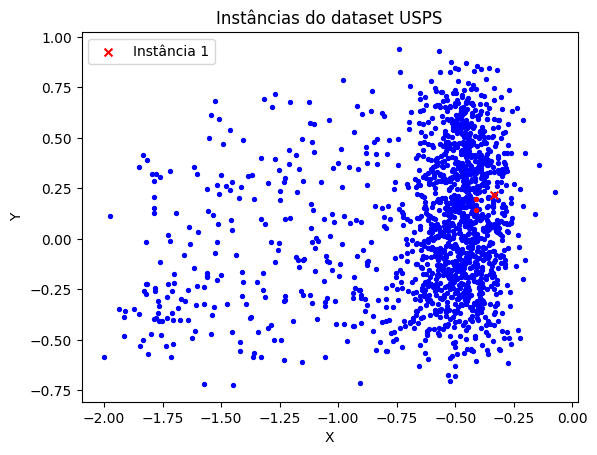

Raio mínimo necessário para a instância 1 ser um objeto core: 3.5340244364500677
Raio mínimo necessário para a instância 2 ser um objeto core: 4.059147236337936
Raio mínimo necessário para a instância 3 ser um objeto core: 4.719855170602876
Raio mínimo necessário para a instância 4 ser um objeto core: 3.2237915413861793
Raio mínimo necessário para a instância 5 ser um objeto core: 2.4819912235735453
Raio mínimo necessário para a instância 6 ser um objeto core: 4.209462961685768
Raio mínimo necessário para a instância 7 ser um objeto core: 3.6835064663709383
Raio mínimo necessário para a instância 8 ser um objeto core: 4.828855966204327
Raio mínimo necessário para a instância 9 ser um objeto core: 3.5973320458233866
Raio mínimo necessário para a instância 10 ser um objeto core: 5.195696490331667
Raio mínimo necessário para a instância 11 ser um objeto core: 6.8680866118849195
Raio mínimo necessário para a instância 12 ser um objeto core: 4.910902047801788
Raio mínimo necessário para a i

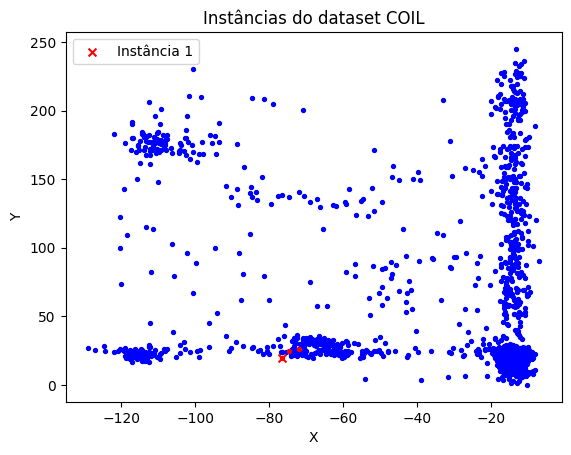

Raio mínimo necessário para a instância 1 ser um objeto core: 71.5545709884644
Raio mínimo necessário para a instância 2 ser um objeto core: 91.47619051146494
Raio mínimo necessário para a instância 3 ser um objeto core: 62.45865214959864
Raio mínimo necessário para a instância 4 ser um objeto core: 272.6039949616531
Raio mínimo necessário para a instância 5 ser um objeto core: 191.15021749367799
Raio mínimo necessário para a instância 6 ser um objeto core: 42.41565914266286
Raio mínimo necessário para a instância 7 ser um objeto core: 58.8917602524194
Raio mínimo necessário para a instância 8 ser um objeto core: 44.206932016316344
Raio mínimo necessário para a instância 9 ser um objeto core: 45.26292573153712
Raio mínimo necessário para a instância 10 ser um objeto core: 94.02837013482296
Raio mínimo necessário para a instância 11 ser um objeto core: 95.95927296137536
Raio mínimo necessário para a instância 12 ser um objeto core: 56.42998479929601
Raio mínimo necessário para a instânc

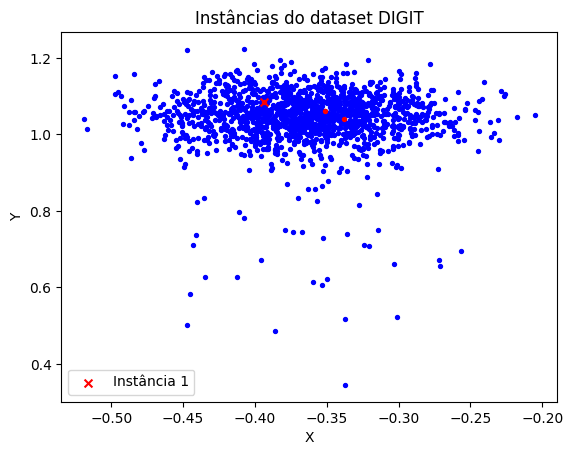

Raio mínimo necessário para a instância 1 ser um objeto core: 1.508767988583
Raio mínimo necessário para a instância 2 ser um objeto core: 1.491433862796817
Raio mínimo necessário para a instância 3 ser um objeto core: 1.566314713226534
Raio mínimo necessário para a instância 4 ser um objeto core: 1.4261253002987457
Raio mínimo necessário para a instância 5 ser um objeto core: 1.3411227054899113
Raio mínimo necessário para a instância 6 ser um objeto core: 1.5594631049155514
Raio mínimo necessário para a instância 7 ser um objeto core: 1.3470227425302757
Raio mínimo necessário para a instância 8 ser um objeto core: 1.4188541669047392
Raio mínimo necessário para a instância 9 ser um objeto core: 1.4195259648884064
Raio mínimo necessário para a instância 10 ser um objeto core: 1.292210895808069
Raio mínimo necessário para a instância 11 ser um objeto core: 1.6623071449100089
Raio mínimo necessário para a instância 12 ser um objeto core: 1.590521380844017
Raio mínimo necessário para a ins

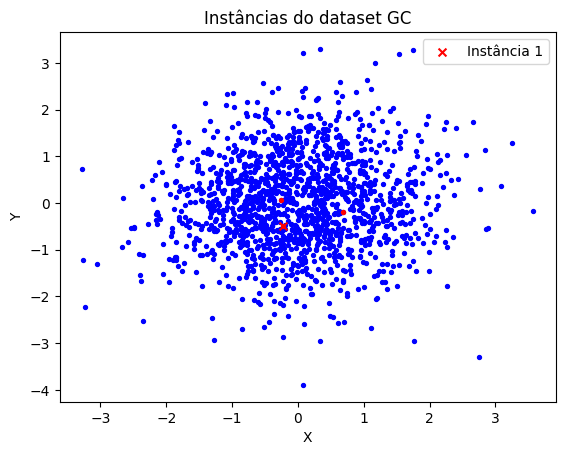

Raio mínimo necessário para a instância 1 ser um objeto core: 18.943629434820302
Raio mínimo necessário para a instância 2 ser um objeto core: 18.881543110298782
Raio mínimo necessário para a instância 3 ser um objeto core: 19.509343382111737
Raio mínimo necessário para a instância 4 ser um objeto core: 18.761528097631157
Raio mínimo necessário para a instância 5 ser um objeto core: 19.616361775017808
Raio mínimo necessário para a instância 6 ser um objeto core: 19.588948784442792
Raio mínimo necessário para a instância 7 ser um objeto core: 19.09531348590589
Raio mínimo necessário para a instância 8 ser um objeto core: 18.57872729822308
Raio mínimo necessário para a instância 9 ser um objeto core: 20.044096943866794
Raio mínimo necessário para a instância 10 ser um objeto core: 17.94923948311508
Raio mínimo necessário para a instância 11 ser um objeto core: 18.968465204284207
Raio mínimo necessário para a instância 12 ser um objeto core: 19.87201381589767
Raio mínimo necessário para a

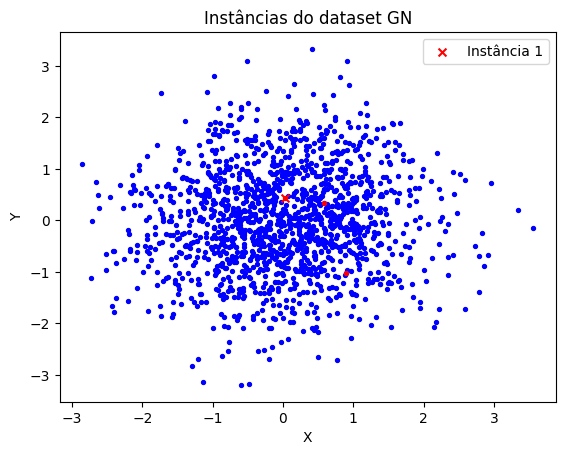

Raio mínimo necessário para a instância 1 ser um objeto core: 18.844188294633813
Raio mínimo necessário para a instância 2 ser um objeto core: 18.93636095694788
Raio mínimo necessário para a instância 3 ser um objeto core: 19.28190436768809
Raio mínimo necessário para a instância 4 ser um objeto core: 19.36339047471093
Raio mínimo necessário para a instância 5 ser um objeto core: 18.41958641318705
Raio mínimo necessário para a instância 6 ser um objeto core: 19.453057294524402
Raio mínimo necessário para a instância 7 ser um objeto core: 19.209239761151036
Raio mínimo necessário para a instância 8 ser um objeto core: 17.71998437479526
Raio mínimo necessário para a instância 9 ser um objeto core: 18.563811847749076
Raio mínimo necessário para a instância 10 ser um objeto core: 19.25005428677754
Raio mínimo necessário para a instância 11 ser um objeto core: 19.079299199773672
Raio mínimo necessário para a instância 12 ser um objeto core: 19.302487397651618
Raio mínimo necessário para a i

In [180]:
numeroMinimoDePontos = 3

for dataset_name, dataset in datasets.items():
    X = dataset['data']

    plt.figure()
    for i in range(1, len(X)):
        plt.scatter(X[i, 0], X[i, 1], c='b', marker='o', s=8)
    

    listaDeRaiosMinimos, listaDeIndicesVizinhos = computeCoreDistance(X, numeroMinimoDePontos)

    for i in listaDeIndicesVizinhos[0]:
        plt.scatter(X[i, 0], X[i, 1], c='r', marker='o', s=8)


    plt.scatter(X[0, 0], X[0, 1], c='r', marker='x', s=32, label='Instância 1')

    print(listaDeRaiosMinimos)
    print(listaDeIndicesVizinhos)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Instâncias do dataset {dataset_name}')
    plt.legend()
    plt.show()

    for i, min_radius in enumerate(listaDeRaiosMinimos):
        print(f"Raio mínimo necessário para a instância {i+1} ser um objeto core: {min_radius}")


# Segundo passo do HDBSCAN*

Definição: Gmpts é o grafo de alcançabilidade mútua, sendo um grafo completo, em que os pontos são os objetos do dataset e os pesos das areastas é a distância de alcançabilidade entre os pontos

A distância de alcançabilidade entre os pontos X1 e X2 é dada pelo maior valor entre: CoreDistance(X1), CoreDistance(X2) e Distância(X1, X2)


## Criar uma árvore geradora mínima a partir do Gmpts

In [ ]:
# TEMOS QUE CRIAR UMA FUNÇÃO QUE CALCULA A DISTÂNCIA DE ALCANÇABILIDADE ENTRE DOIS PONTOS

